## **EDA :** Customer Churn

#### _Customer Churn Dataset_

🟠 `on work`

---

1. **Identification générale**
    * Structure
    * Valeurs cibles
    * Types de valeurs
    * Valeurs manquantes ou défectueuses
    * Commentaires
    * Préparation
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
3. **Analyse bivariée**
    * ..

**Built-in**

In [1]:
# Built-in Modules from Python

**Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pingouin as pg

**User functions**

In [2]:
# Useful functions for EDA

**Notebook setup**

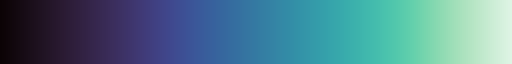

In [45]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
churn_c = [
    '#b8e600', # Yes
    '#e60073' # No
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, icefire ...
sns.color_palette("mako", as_cmap=True)

**Customer Churn**

(_no url_)

<img src="./_datasets/features_explanation.png" alt="features explanation" title="Features in Dataset : explanation" width="960" height="426">

In [48]:
churn_file_path = './_datasets/churn_data.xlsx'
churn_data = pd.read_excel(churn_file_path, sheet_name="Churn Modelling")

churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Notes**
* `CreditScore`, _creditworthiness_ : la "solvabilité"
* `HasCrCard` : est une quantité, pas une valeur binaire 
* `Balance` : le solde sur le compte bancaire
* `Age` : au moment de s'être enregistré comme client, ce n'est pas l'âge d'aujourd'hui

---
### **1.** Identification générale

_Stade intuitif de l'analyse, et basé sur l'expérience_

##### **1.1** - Structure

In [4]:
# (!) - 10,000 rows and 14 columns
churn_data.shape

(10000, 14)

In [5]:
# (!) - Multi type data and 0 non-null assumed
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### **1.2** - Valeurs cibles

In [6]:
# (!) - Target is 'Exited', assumed 1 = Yes, 0 = No
churn_data['Exited'].unique()

array([1, 0], dtype=int64)

##### **1.3** - Types de valeurs

In [7]:
# (!) - 3 types of data
churn_data.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [20]:
# (!) - 'HasCrCard' and 'IsActiveMember' might be categoricals
pd.DataFrame({
    'Valeurs minimums': churn_data.select_dtypes(np.int64).min(),
    'Valeurs maximums': churn_data.select_dtypes(np.int64).max()
}, dtype=np.int64)

,Valeurs minimums,Valeurs maximums
RowNumber,1,10000
CustomerId,15565701,15815690
CreditScore,350,850
Age,18,92
Tenure,0,10
NumOfProducts,1,4
HasCrCard,0,1
IsActiveMember,0,1
Exited,0,1


In [8]:
# (!) - Real floating values
pd.DataFrame({
    'Valeurs minimums': churn_data.select_dtypes(np.float64).min(),
    'Valeurs maximums': churn_data.select_dtypes(np.float64).max()
}, dtype=np.float64)

,Valeurs minimums,Valeurs maximums
Balance,0.00,250898.09
EstimatedSalary,11.58,199992.48


In [14]:
# (!) - Columns 'Geography' and 'Gender' might be categoricals
churn_data.select_dtypes(np.object_)

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


##### **1.4** - Valeurs défectueuses

Valeurs nulles

In [9]:
# (!) - No Null
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Valeurs uniques

In [21]:
# (!) - There're only 2932 values for 'Surname' in a 10,000 rows dataset
churn_data.select_dtypes(np.object_).nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [11]:
# (!) - Only 3 countries
churn_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Valeurs dupliquées

In [37]:
# (!) - No duplicated Ids
churn_data.loc[churn_data.duplicated('CustomerId'), ['CustomerId', 'Gender', 'Age']]

,CustomerId,Gender,Age


In [22]:
# (!) - It's 7068 duplicated values by 'Surname'
churn_data.loc[churn_data.duplicated('Surname'), ['CustomerId', 'Surname', 'Gender', 'Age', 'Tenure', 'Balance']]

,CustomerId,Surname,Gender,Age,Tenure,Balance
89,15767954,Osborne,Female,28,3,81623.67
94,15676966,Capon,Male,42,4,0.00
102,15580146,Hung,Male,31,9,82674.15
114,15609618,Fanucci,Male,28,9,154475.54
122,15690673,Cameron,Female,39,6,0.00
...,...,...,...,...,...,...
9995,15606229,Obijiaku,Male,39,5,0.00
9996,15569892,Johnstone,Male,35,10,57369.61
9997,15584532,Liu,Female,36,7,0.00
9998,15682355,Sabbatini,Male,42,3,75075.31


In [38]:
# (!) - 'Smith' is the most common
churn_data['Surname'].value_counts().sort_values(ascending=False).head(10)

Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Name: Surname, dtype: int64

In [49]:
# (!) - Example with 'Smith', it's not the same person
churn_data.loc[churn_data['Surname'] == 'Smith', ['CustomerId', 'Surname', 'Gender', 'Age', 'Tenure', 'Balance', 'Geography']].sort_values('Age')

,CustomerId,Surname,Gender,Age,Tenure,Balance,Geography
1064,15699598,Smith,Female,20,4,0.00,France
7017,15767729,Smith,Male,25,5,182876.88,Spain
479,15797736,Smith,Male,29,4,80262.60,France
...,...,...,...,...,...,...,...
234,15704769,Smith,Female,67,5,113978.97,France
6230,15616954,Smith,Male,71,4,0.00,France
5671,15805104,Smith,Female,73,6,0.00,France


In [36]:
# () - The Smiths are very distinct poeple
churn_data.loc[churn_data['Surname'] == 'Smith', ['Gender', 'Age', 'Tenure', 'Geography']].nunique()

Gender        2
Age          23
Tenure       10
Geography     3
dtype: int64

##### **1.5** - Commentaires

> —
>
> Il n'y a pas de doublon, même en considérant les redondances dans `Surname`. Sinon, les clients auraient le même `CustomerId`, et seraient vraiment la même personne (cf. `Gender`, `Age`, `Tenure`, `Balance`).
>
> L'âge est présenté comme "_at the time of being a customer_", il pourrait être intéressant de calculer l'âge de la personne grâce à `Tenure` au moment de quiter la banque.
>
> Les champs `RowNumber` et `CustomerId` peuvent être laisés de côté. 
>
> Le champ `Surname` peut également être abandonné. Dans ce dataset, absolument rien ne nous permet de vérifier si deux personnes portant le même nom sont mariés (ou en cohabitation légale). Et donc de chercher si les départs sont plus ou moins fréquents lorsque deux personnes d'un même couple partage la même banque.
>
> —

##### **1.6** - Préparation

* faciliter la manipulation et la **visualisation** des données

In [47]:
# Rename cols
columns = {
    'HasCrCard': 'HasCreditCard'
}

# Rename categories
factors = {
    0: 'No',
    1: 'Yes'
}

# Copy and apply modifications
churn_df = churn_data.copy()
churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)
churn_df.rename(columns=columns, inplace=True)
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].map(factors)
churn_df['Exited'] = churn_df['Exited'].map(factors)

churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,No,113931.57,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36,7,0.00,1,0,Yes,42085.58,Yes
9998,772,Germany,Male,42,3,75075.31,2,1,No,92888.52,Yes
9999,792,France,Female,28,4,130142.79,1,1,No,38190.78,No


In [55]:
# (!) - Extract column names for variables
continous = churn_df.select_dtypes(np.float64).columns.to_list() + ['Age', 'CreditScore']

discretes = ['Tenure', 'NumOfProducts', 'HasCreditCard']

categoricals = churn_df.select_dtypes(np.object_).columns.to_list()
categoricals.remove('Exited')

display(
    continous,
    discretes,
    categoricals
)

['Balance', 'EstimatedSalary', 'Age', 'CreditScore']

['Tenure', 'NumOfProducts', 'HasCreditCard']

['Geography', 'Gender', 'IsActiveMember']

---
### **2.** Analyse univariée

##### **2.1** - Cible

In [ ]:
# (!) - Target distribution

##### **2.2** - Variables quantitatives continues

In [ ]:
# (!) - Features distribution (freq.)

In [ ]:
# (!) - Features density

In [ ]:
# (!) - Features outlier and distribution

In [ ]:
# (!) - Display entries with outlied features

##### **2.3** - Variables quantitatives discrètes

##### **2.4** - Variables qualitatives

In [ ]:
# (!) - Category features distribution

---
### **3.** Analyse bivariée

In [ ]:
# (!) - Feature densities by target

In [ ]:
# (!) - Feature outliers by target

In [ ]:
# (!) - Stats sum-up by target

In [ ]:
# (!) - Feature distributions by features

In [ ]:
# (!) - Correlation links between features

In [ ]:
# (!) - Comparison of correlation method evaluation (kendall, spearman)

In [ ]:
# (!) - Tests p-val